In [125]:
from bs4 import BeautifulSoup
import pandas as pd
import math
import time
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import nltk
import string
import re

# Global Variable
call_cross_validation = True

# Drop columns we don't need 
def drop_data(df):
    df_5star = df.drop(columns=['style','unixReviewTime','vote','image'])
    df_5star = df_5star.dropna()
    df_5star = df_5star.drop_duplicates()
    df_5star = df_5star.reset_index(drop=True)
    return df_5star

# Evaluate the prediction result
def evaluate(prediction, actual):
    if len(prediction)!=len(actual):
        print("Length not equal")
        return
    mean_diff = 0
    correct = 0
    wrong = 0
    over_predict = 0
    under_predict = 0
    for i in range(len(prediction)):
        # Correct prediction
        if prediction[i]==actual[i]:
            correct+=1
        # Wrong prediction
        else:
            diff = prediction[i]-actual[i]
            if diff > 0:
                over_predict+=1
            else:
                under_predict+=1
            mean_diff += abs(diff)
            wrong += 1
    mean_diff = round(mean_diff/wrong,2)
    over_predict_rate = round(over_predict/len(prediction),2)
    under_predict_rate = round(under_predict/len(prediction),2)
    print(classification_report(actual,prediction))
    print("Average prediction error: "+str(mean_diff))
    print("Rate of predicting high: "+str(over_predict_rate))
    print("Rate of predicting low: "+str(under_predict_rate))
    plt.show()

In [126]:
df = pd.read_pickle('./dataframe/Phones_Selected.pkl')
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,5.0,True,"09 19, 2015",A334NESAG7QXWY,B013BFBKIQ,Ceasar Garcia,This is great I wish I can give 10 stars. I lo...,This is great I wish I can give 10 stars
1,5.0,True,"02 26, 2016",A2NWTLELAHOQHQ,B017NE3L3I,Dbisn6x0,Great quality cords...my only gripe is that th...,Loooong
2,4.0,True,"11 28, 2017",AAQW4RZEJNDN8,B005ZD6WQS,Leela,Met expectations,Four Stars
3,5.0,True,"04 18, 2016",A7HO43YW6ST1T,B00NFZN004,John,"Nice case. Very slim, so don't expect the same...",Nice case. Very slim
4,4.0,True,"02 3, 2017",A2534VA71G4SU,B00JV6CJRG,Raimondas Sadauskas,good,Four Stars
...,...,...,...,...,...,...,...,...
29995,5.0,True,"05 7, 2015",A1N6V1PA42TF9R,B00GJ4XX14,"Yu, MIng",thank you,thank you
29996,5.0,True,"07 15, 2016",A20TN07VDAUTBS,B009P16FKY,Peepeeth,Good price. Great product.,Five Stars
29997,5.0,True,"09 25, 2016",A1O4D5K0STI80W,B01GLC568G,Lisa O.,This is a very nice product. It is durable an...,"Very nice, but not what I needed."
29998,5.0,True,"09 19, 2016",A2GL8ZFZKIJ8W,B00LVCPDNU,Bear,Nice cables !,Great


In [127]:
# See how the rating is distributed in this category
def rate_distribution(df,title):
    df_overall = df['overall']
    lables = ["1.0","2.0","3.0","4.0","5.0"]
    rate_count = []
    for i in range(1,6):
        count = 0
        for rate in df_overall:
            if rate==i:
                count+=1
        rate_count.append(count)
    percentage_of_5_rate = rate_count[4]/len(df_overall)
    print(str(round(percentage_of_5_rate*100.0,2))+"% of the rate is 5.0 in this category")
    # Plot bar chart
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(lables,rate_count)
    plt.xlabel("overall rate")
    plt.title(title)
    plt.show()

62.76% of the rate is 5.0 in this category


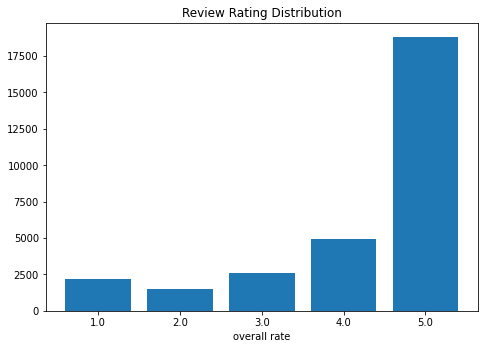

In [128]:
rate_distribution(df,'Review Rating Distribution')

In [129]:
 nltk.download('stopwords')
 nltk.download('punkt')
 nltk.download('averaged_perceptron_tagger')
 
 # This is the text function I wrote. TfidfVectorizer seem to handle them all, but I am going to call this function just in case
 def text_process(text,remove_stopwords):
    # Remove HTML
    return_text = BeautifulSoup(text).get_text()
    # Remove URL
    return_text = re.sub(r'http\S+','',return_text)
    # remove numbers
    return_text = re.sub(r'[0-9]','',return_text)
    # change all letters to lowercase
    return_text = return_text.lower()
    # remove punctuation
    punc_func = str.maketrans('','',string.punctuation)
    return_text = return_text.translate(punc_func)
    # remove whitespace
    return_text = " ".join(return_text.split())
    # remove stopwords
    #if(remove_stopwords==True):
    #    stop_words = set(nltk.corpus.stopwords.words("english"))
    #    tokenized_text = nltk.tokenize.word_tokenize(return_text)
    #    return_text = [word for word in tokenized_text if word not in stop_words]
    #else:
    #    return_text = nltk.tokenize.word_tokenize(return_text)
    #s = " "
    return return_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Neil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [130]:
# Text preprocessing
df_processed = df.copy()
df_processed['reviewText'] = df['reviewText'].apply(lambda x:text_process(x,True))

C:\Users\Neil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.amazon.com/gp/product/B00N3VHE7U?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_8" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\Neil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://images-na.ssl-images-amazon.com/images/I/51p4DMHYhhL._SS300_.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\Neil\AppData\Local\Packages\PythonSoftwareF

In [131]:
# TF_IDF feature extraction
vectorizer = TfidfVectorizer(stop_words = 'english',max_df=0.8,min_df=0.01)
X = vectorizer.fit_transform(df_processed['reviewText'])
X

<30000x373 sparse matrix of type '<class 'numpy.float64'>'
	with 314308 stored elements in Compressed Sparse Row format>

In [132]:
# The words that used for features. These words are taking into consideration of predicting the rate
vectorizer.get_feature_names()

['able',
 'absolutely',
 'actually',
 'add',
 'advertised',
 'air',
 'amazing',
 'amazon',
 'android',
 'apple',
 'apply',
 'arrived',
 'away',
 'awesome',
 'bad',
 'battery',
 'beautiful',
 'belt',
 'best',
 'better',
 'big',
 'bit',
 'black',
 'blue',
 'bluetooth',
 'bought',
 'box',
 'brand',
 'break',
 'broke',
 'bubbles',
 'built',
 'bulk',
 'bulky',
 'button',
 'buttons',
 'buy',
 'buying',
 'cable',
 'cables',
 'came',
 'camera',
 'car',
 'card',
 'cards',
 'carry',
 'case',
 'cases',
 'cell',
 'change',
 'charge',
 'charged',
 'charger',
 'chargers',
 'charges',
 'charging',
 'cheap',
 'clean',
 'clear',
 'clip',
 'close',
 'color',
 'colors',
 'come',
 'comes',
 'comfortable',
 'company',
 'completely',
 'cons',
 'cool',
 'cord',
 'cost',
 'couple',
 'cover',
 'covers',
 'cracked',
 'customer',
 'cut',
 'cute',
 'damage',
 'day',
 'days',
 'deal',
 'decent',
 'definitely',
 'described',
 'design',
 'device',
 'devices',
 'did',
 'didnt',
 'different',
 'difficult',
 'disappoin

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

# Cross validation to find best parameters for the estimator
def tune_parameter(estimator, parameters, train_data, train_label):
    cv = GridSearchCV(estimator,parameters)
    cv = cv.fit(train_data,train_label)
    print("Best Parameter: ")
    print(cv.best_params_)
    mean_list = cv.cv_results_['mean_test_score']
    time_list = cv.cv_results_['mean_fit_time']
    means = round(sum(mean_list)/len(mean_list),4)
    fit_time = round(sum(time_list)/len(time_list),4)
    print("mean test score: "+str(means))
    print("mean fit time: "+str(fit_time))
    return cv

# Separate the data to train data and test data
stop_i = round(0.9*len(df_processed))
review_X = X.toarray()
train_data = review_X[0:stop_i]
train_label = df_processed['overall'].iloc[0:stop_i]
validate_data = review_X[stop_i:len(df_processed)]
validate_label = df_processed['overall'].iloc[stop_i:len(df_processed)].to_numpy()

In [134]:
from sklearn import tree
def decisionTree(train_data,train_label,validate_data,validate_label,use_cv):
    print("Decision Tree Algorithm")
    clf = tree.DecisionTreeClassifier()
    if(use_cv==True):
        parameters = {'criterion':('gini','entropy'),'splitter':('best','random')}
        cv = tune_parameter(clf,parameters,train_data, train_label)
        # Run the model with the best parameters
        clf = tree.DecisionTreeClassifier(**cv.best_params_)
    clf = clf.fit(train_data,train_label)
    prediction = clf.predict(validate_data)
    plot_confusion_matrix(clf,validate_data,validate_label)
    evaluate(prediction,validate_label)
    print(" ")
    return prediction

In [135]:
from sklearn.svm import SVC
# SVM seems to run really slow on this data, so I didn't put cross validation here
def SVM(train_data,train_label,validate_data,validate_label):
    print("SVM Algorithm")
    clf = SVC(kernel='linear')
    #parameters = {'kernel':('linear','poly','rbf')}
    #cv = tune_parameter(clf,parameters,train_data,train_label)
    #clf = svm.SVC(**cv.best_params_)
    start = time.time()
    clf = clf.fit(train_data,train_label)
    stop1 = time.time()
    prediction = clf.predict(validate_data)
    stop2 = time.time()
    print("SVM Train time: "+str(round(stop1-start,4)))
    print("SVM prediction time: "+str(round(stop2-stop1,4)))
    evaluate(prediction,validate_label)
    print(" ")
    return prediction

In [136]:
from sklearn.linear_model import LogisticRegression

def logRegression(train_data,train_label,validate_data,validate_label,use_cv):
    print("Logistic Regression Algorithm")
    clf = LogisticRegression(max_iter=10000)
    if use_cv==True:
        parameters = {'solver':('lbfgs','liblinear'),'C':[0.001,0.01,0.1,1,10,100,1000],'max_iter':[10000]}
        cv = tune_parameter(clf,parameters,train_data,train_label)
        # Run the model with the best parameters
        clf = LogisticRegression(**cv.best_params_)
    clf = clf.fit(train_data,train_label)
    prediction = clf.predict(validate_data)
    plot_confusion_matrix(clf,validate_data,validate_label)
    evaluate(prediction,validate_label)
    print(" ")
    return prediction

In [137]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(train_data,train_label,validate_data,validate_label,use_cv):
    print("KNN Algorithm")
    clf = KNeighborsClassifier()
    if use_cv==True:
        parameters = {'weights':('uniform','distance'),'n_neighbors':[5,10,50,100]}
        cv = tune_parameter(clf,parameters,train_data,train_label)
        # Run the model with the best parameters
        clf = KNeighborsClassifier(**cv.best_params_)
    clf.fit(train_data, train_label)
    prediction = clf.predict(validate_data)
    plot_confusion_matrix(clf,validate_data,validate_label)
    evaluate(prediction,validate_label)
    return prediction

KNN Algorithm
Best Parameter: 
{'n_neighbors': 50, 'weights': 'uniform'}
mean test score: 0.6187
mean fit time: 0.0585
C:\Users\Neil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neil\AppData\Local\Packages\PythonSoftwareFoundation.Pyt

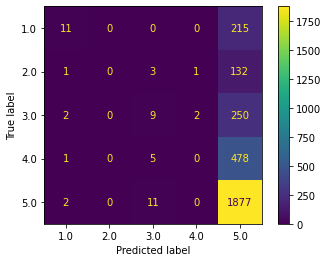

Decision Tree Algorithm
Best Parameter: 
{'criterion': 'entropy', 'splitter': 'random'}
mean test score: 0.5609
mean fit time: 4.2062
              precision    recall  f1-score   support

         1.0       0.33      0.32      0.33       226
         2.0       0.14      0.11      0.12       137
         3.0       0.21      0.17      0.18       263
         4.0       0.26      0.23      0.24       484
         5.0       0.73      0.79      0.76      1890

    accuracy                           0.58      3000
   macro avg       0.33      0.32      0.33      3000
weighted avg       0.55      0.58      0.56      3000

Average prediction error: 1.82
Rate of predicting high: 0.23
Rate of predicting low: 0.19


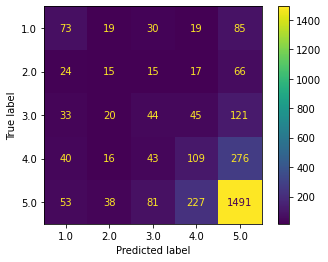

 
Logistic Regression Algorithm
Best Parameter: 
{'C': 100, 'max_iter': 10000, 'solver': 'liblinear'}
mean test score: 0.6517
mean fit time: 4.1654
              precision    recall  f1-score   support

         1.0       0.55      0.45      0.50       226
         2.0       0.19      0.06      0.09       137
         3.0       0.34      0.15      0.21       263
         4.0       0.34      0.15      0.21       484
         5.0       0.72      0.93      0.81      1890

    accuracy                           0.66      3000
   macro avg       0.43      0.35      0.36      3000
weighted avg       0.59      0.66      0.61      3000

Average prediction error: 1.75
Rate of predicting high: 0.26
Rate of predicting low: 0.08


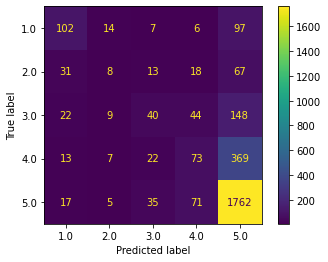

In [138]:
# Model prediction result
prediction1=KNN(train_data,train_label,validate_data,validate_label,call_cross_validation)
prediction2=decisionTree(train_data,train_label,validate_data,validate_label,call_cross_validation)
prediction3=logRegression(train_data,train_label,validate_data,validate_label,call_cross_validation)
#prediction4=SVM(train_data,train_label,validate_data,validate_label)

In [139]:
df2 = pd.read_pickle('./dataframe/Phones_Selected_2.pkl')
df2

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary
0,1.0,True,"12 12, 2016",A14FGNGLRF7HPN,B00QFHZURK,Scott,Worked for ONE day and then the USB charging p...,Very poor quality...
1,1.0,True,"02 28, 2016",A1464S0U3Q9VS0,B00YR23W1G,cutekittensmeow,I can't begin to express how awful this phone ...,The only time that I was ever happy holding th...
2,2.0,True,"04 10, 2013",A3CPQ7XPH9REWI,B00AK4JUA2,chema,screen protector is thick and you will have a ...,warning!!!
3,1.0,True,"01 25, 2013",AO2SPAMMXYYNC,B0090DDUG4,dilly-tree,Its very deceiving amd does not have the prote...,okay..
4,1.0,True,"04 14, 2016",A1JK4MGX20U8LF,B00MX7F8GO,mark m.,Uhh!,One Star
...,...,...,...,...,...,...,...,...
39995,5.0,True,"10 26, 2015",A3F2CG8192P3NN,B013VRSRVW,Barbara Dunn Johnston,Great,Five Stars
39996,5.0,True,"08 12, 2016",A34EW69S9SEU3E,B016BLQAK0,Born to Shop,"Works great. I put a check, a $20, DL, and a ...",I like it.
39997,5.0,True,"11 28, 2016",A1KKNS2AYUM1I8,B00UBDI7EC,S. Kong,Product was exactly as it was described and it...,Five Stars
39998,4.0,True,"03 5, 2005",A1N4P89OQJ0LN0,B000246XQE,William Reading,I picked up this headset the other day and I'm...,Not bad at all


39.4% of the rate is 5.0 in this category


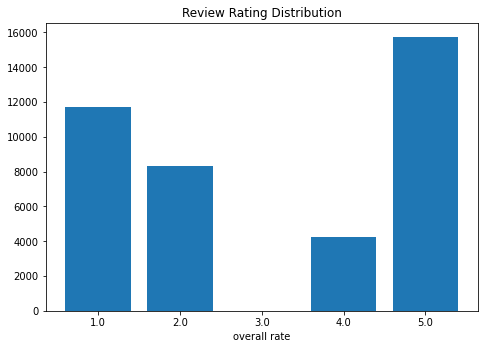

In [140]:
rate_distribution(df2,"Review Rating Distribution")

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
df_processed_2 = df2.copy()
df_processed_2['reviewText'] = df2['reviewText'].apply(lambda x:text_process(x,True))
# TF_IDF feature extraction
vectorizer = TfidfVectorizer(stop_words = 'english',max_df=0.8,min_df=0.01)
X = vectorizer.fit_transform(df_processed_2['reviewText'])
# Separate the data to train data and test data
random.seed(0)
r = 0.9*len(df_processed_2)
random_index = random.sample(range(0,len(df_processed_2)),int(r))
review_X = X.toarray()
train_data_2 = []
train_label_2 = []
test_data_2 = []
test_label_2 = []
# The labels of this dataset are actually in order, so I have to shuffle them.
for i in range(len(df_processed_2)):
    if i in random_index:
        train_data_2.append(review_X[i])
        train_label_2.append(df_processed_2['overall'].iloc[i])
    else:
        test_data_2.append(review_X[i])
        test_label_2.append(df_processed_2['overall'].iloc[i])

C:\Users\Neil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.amazon.com/gp/product/B00IEYHMQ4?psc=1&redirect=true&ref_=oh_aui_detailpage_o00_s00" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


KNN Algorithm
Best Parameter: 
{'n_neighbors': 10, 'weights': 'distance'}
mean test score: 0.4863
mean fit time: 0.0851
              precision    recall  f1-score   support

         1.0       0.48      0.57      0.52      1180
         2.0       0.34      0.14      0.20       818
         4.0       0.33      0.05      0.09       450
         5.0       0.54      0.78      0.64      1552

    accuracy                           0.50      4000
   macro avg       0.43      0.38      0.36      4000
weighted avg       0.46      0.50      0.45      4000

Average prediction error: 2.49
Rate of predicting high: 0.29
Rate of predicting low: 0.21


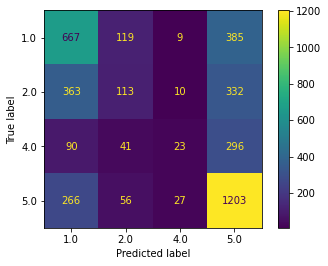

Decision Tree Algorithm
Best Parameter: 
{'criterion': 'gini', 'splitter': 'random'}
mean test score: 0.515
mean fit time: 5.613
              precision    recall  f1-score   support

         1.0       0.52      0.54      0.53      1180
         2.0       0.31      0.27      0.29       818
         4.0       0.25      0.18      0.21       450
         5.0       0.65      0.73      0.68      1552

    accuracy                           0.52      4000
   macro avg       0.43      0.43      0.43      4000
weighted avg       0.50      0.52      0.50      4000

Average prediction error: 2.1
Rate of predicting high: 0.26
Rate of predicting low: 0.23


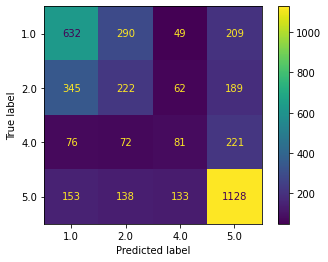

 
Logistic Regression Algorithm
Best Parameter: 
{'C': 1, 'max_iter': 10000, 'solver': 'lbfgs'}
mean test score: 0.583
mean fit time: 3.4185
              precision    recall  f1-score   support

         1.0       0.58      0.72      0.64      1180
         2.0       0.42      0.27      0.33       818
         4.0       0.43      0.08      0.14       450
         5.0       0.69      0.86      0.76      1552

    accuracy                           0.61      4000
   macro avg       0.53      0.48      0.47      4000
weighted avg       0.57      0.61      0.57      4000

Average prediction error: 1.97
Rate of predicting high: 0.2
Rate of predicting low: 0.19


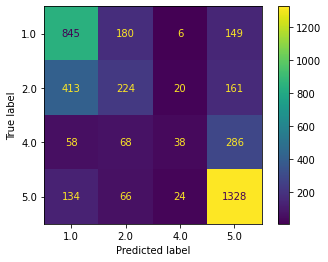

In [142]:
prediciton1=KNN(train_data_2,train_label_2,test_data_2,test_label_2,call_cross_validation)
prediction2=decisionTree(train_data_2,train_label_2,test_data_2,test_label_2,call_cross_validation)
prediction3=logRegression(train_data_2,train_label_2,test_data_2,test_label_2,call_cross_validation)

In [143]:
df_processed_3 = df2.copy()
df_processed_3['reviewText'] = df2['reviewText'].apply(lambda x:text_process(x,True))
df_processed_3.loc[df_processed_3.overall==2,'overall']=0
df_processed_3.loc[df_processed_3.overall==1,'overall']=0
df_processed_3.loc[df_processed_3.overall==5,'overall']=1
df_processed_3.loc[df_processed_3.overall==4,'overall']=1

C:\Users\Neil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.amazon.com/gp/product/B00IEYHMQ4?psc=1&redirect=true&ref_=oh_aui_detailpage_o00_s00" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [144]:
# TF_IDF feature extraction
vectorizer = TfidfVectorizer(stop_words = 'english',max_df=0.8,min_df=0.01)
X = vectorizer.fit_transform(df_processed_3['reviewText'])
# Separate the data to train data and test data
random.seed(1)
r = 0.9*len(df_processed_2)
random_index = random.sample(range(0,len(df_processed_2)),int(r))
review_X = X.toarray()
train_data_3 = []
train_label_3 = []
test_data_3 = []
test_label_3 = []
# Same shuffling here
for i in range(len(df_processed_2)):
    if i in random_index:
        train_data_3.append(review_X[i])
        train_label_3.append(df_processed_3['overall'].iloc[i])
    else:
        test_data_3.append(review_X[i])
        test_label_3.append(df_processed_3['overall'].iloc[i])

KNN Algorithm
Best Parameter: 
{'n_neighbors': 10, 'weights': 'distance'}
mean test score: 0.6914
mean fit time: 0.0816
              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      2006
         1.0       0.74      0.74      0.74      1994

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000

Average prediction error: 1.0
Rate of predicting high: 0.13
Rate of predicting low: 0.13


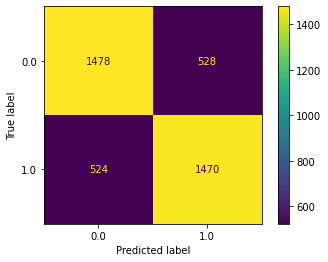

Decision Tree Algorithm
Best Parameter: 
{'criterion': 'entropy', 'splitter': 'best'}
mean test score: 0.7665
mean fit time: 5.9284
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      2006
         1.0       0.76      0.80      0.78      1994

    accuracy                           0.78      4000
   macro avg       0.78      0.78      0.78      4000
weighted avg       0.78      0.78      0.78      4000

Average prediction error: 1.0
Rate of predicting high: 0.12
Rate of predicting low: 0.1


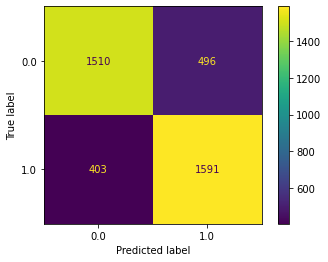

 
Logistic Regression Algorithm
Best Parameter: 
{'C': 1000, 'max_iter': 10000, 'solver': 'liblinear'}
mean test score: 0.8277
mean fit time: 0.4624
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      2006
         1.0       0.85      0.81      0.83      1994

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000

Average prediction error: 1.0
Rate of predicting high: 0.07
Rate of predicting low: 0.09


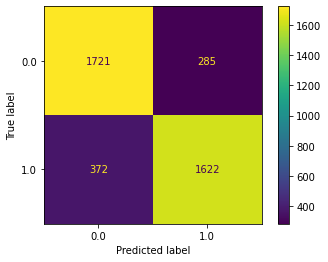

In [145]:
prediciton1=KNN(train_data_3,train_label_3,test_data_3,test_label_3,call_cross_validation)
prediction2=decisionTree(train_data_3,train_label_3,test_data_3,test_label_3,call_cross_validation)
prediction3=logRegression(train_data_3,train_label_3,test_data_3,test_label_3,call_cross_validation)

In [146]:
# This is k mean clustering I tried. I don't feel that it helps with the project so I didn't write about it in the report
from sklearn.cluster import KMeans
reviewText = df_processed_3['reviewText']
vectorizer_cluster = TfidfVectorizer(stop_words = 'english',min_df=0.01)
X2 = vectorizer_cluster.fit_transform(reviewText)
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X2)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 bulky
 case
 phone
 like
 protection
 great
 little
 good
 fits
 fit
Cluster 1:
 case
 phone
 like
 great
 nice
 good
 protection
 fit
 cases
 screen
Cluster 2:
 phone
 good
 great
 product
 screen
 works
 like
 work
 just
 use
Cluster 3:
 colors
 case
 great
 love
 phone
 like
 different
 nice
 cases
 fit
Cluster 4:
 love
 case
 great
 phone
 color
 fits
 works
 perfect
 good
 product


Prediction


In [147]:
# This is the key word list which I talked about in the paper
valid_word = ['screen','protector','protection','charge','charging','phone','case','cable','battery','bluetooth']

In [148]:
# Class 2 labeling
df_processed_4 = df_processed_3.copy()
for i in range(len(df_processed_4)):
    review_text = df_processed_4['reviewText'].iloc[i]
    has_valid_word = False
    for word in valid_word:
        if word in review_text:
            has_valid_word = True
            break
    if has_valid_word == False:
        df_processed_4['overall'].iloc[i]=2

C:\Users\Neil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [149]:
# TF_IDF feature extraction
vectorizer = TfidfVectorizer(stop_words = 'english',max_df=0.8,min_df=0.01)
X = vectorizer.fit_transform(df_processed_4['reviewText'])
# Separate the data to train data and test data
random.seed(1)
r = 0.9*len(df_processed_4)
random_index = random.sample(range(0,len(df_processed_4)),int(r))
review_X = X.toarray()
train_data_4 = []
train_label_4 = []
test_data_4 = []
test_label_4 = []
# Same shuffling here
for i in range(len(df_processed_4)):
    if i in random_index:
        train_data_4.append(review_X[i])
        train_label_4.append(df_processed_4['overall'].iloc[i])
    else:
        test_data_4.append(review_X[i])
        test_label_4.append(df_processed_4['overall'].iloc[i])

KNN Algorithm
Best Parameter: 
{'n_neighbors': 5, 'weights': 'distance'}
mean test score: 0.482
mean fit time: 0.0896
              precision    recall  f1-score   support

         0.0       0.69      0.30      0.42      1291
         1.0       0.76      0.32      0.45      1180
         2.0       0.51      0.97      0.67      1529

    accuracy                           0.56      4000
   macro avg       0.65      0.53      0.51      4000
weighted avg       0.64      0.56      0.52      4000

Average prediction error: 1.47
Rate of predicting high: 0.39
Rate of predicting low: 0.05


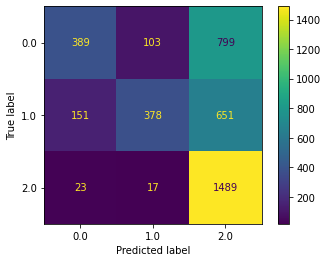

Decision Tree Algorithm
Best Parameter: 
{'criterion': 'entropy', 'splitter': 'best'}
mean test score: 0.8109
mean fit time: 7.1856
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      1291
         1.0       0.69      0.70      0.70      1180
         2.0       0.98      0.98      0.98      1529

    accuracy                           0.81      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.81      0.81      0.81      4000

Average prediction error: 1.04
Rate of predicting high: 0.1
Rate of predicting low: 0.09


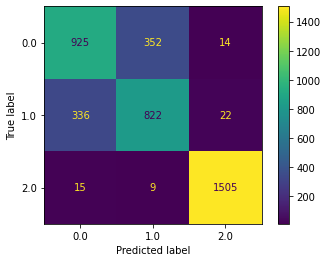

 
Logistic Regression Algorithm
Best Parameter: 
{'C': 100, 'max_iter': 10000, 'solver': 'lbfgs'}
mean test score: 0.82
mean fit time: 3.6792
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      1291
         1.0       0.84      0.81      0.82      1180
         2.0       0.98      1.00      0.99      1529

    accuracy                           0.90      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.90      0.89      4000

Average prediction error: 1.04
Rate of predicting high: 0.05
Rate of predicting low: 0.05


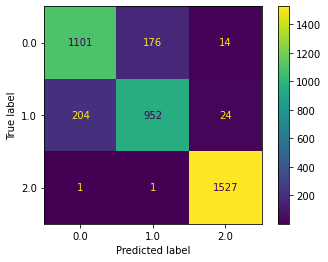

In [150]:
prediciton1=KNN(train_data_4,train_label_4,test_data_4,test_label_4,call_cross_validation)
prediction2=decisionTree(train_data_4,train_label_4,test_data_4,test_label_4,call_cross_validation)
prediction3=logRegression(train_data_4,train_label_4,test_data_4,test_label_4,call_cross_validation)

In [151]:
# Extract the test data
# Because the training data is randomly selected, train data and test data are not in order
index_list = []
for i in range(len(df_processed_4)):
    if i not in random_index:
        index_list.append(i)
len(index_list)

4000

In [159]:
test_data = df_processed_4.iloc[index_list]
original_test_data = df_processed_3.iloc[index_list]
negative_rate = 0
positive_rate = 0
length = 0
# Check true positive of class 2 prediction
# You can see many short reviews which you have no idea what product they are reviewing
for i in range(len(prediction3)):
    if prediction3[i]==2 and test_label_4[i]==2:
        rate = original_test_data['overall'].iloc[i]
        if rate == 1:
            positive_rate+=1
        else:
            negative_rate+=1
        reviewText = test_data['reviewText'].iloc[i]
        reviewID = test_data['reviewerID'].iloc[i]
        length += len(reviewText.split())
        print(reviewText)
        print(rate)
        print(reviewID)
        print(" ")

discolored very quickly around the edges would not recommend fit fine seems like it would help in a drop but turned yellowy brown around the edges
0.0
A1MC6VD3CRTW0I
 
broke in like a month terrible
0.0
ACYCO6DG6OX1K
 
extrremely unhappy with these
0.0
A2BHCWDSAHGK1O
 
nunca sirvionever work it
0.0
AJHDJT9CTBL3E
 
every time i try to zoomit takes picturesdisappointed
0.0
A1A340IX2YT1D2
 
ds on each side very vulnerable even with tempered glass not quality as previously made
0.0
A1TMJMCDCY0NT6
 
nice until it breaks
0.0
A1DK9X1F3L8RA
 
the product was hard for me to apply correctly with few bubbles and i ended up with grit under the product
0.0
A37SSVT00VTAOF
 
cracked within first drop
0.0
A1XW9RUTM0PKDA
 
randomly turns off very annoying
0.0
AB35IEH4A11C5
 
just about impossible to remove from the holster even using two hands
0.0
A1N1CPJZ5MRMM9
 
not very good at all
0.0
A2E75R1WO4QGH4
 
this weighs about pounds and is very difficult to bend and attach thus ive never used it i do not 

In [153]:
class2_total = positive_rate+negative_rate
class2_rate = class2_total/len(test_data)
positive_unhelpful = positive_rate/class2_total
negative_unhelpful = negative_rate/class2_total
average_length = length/len(test_data)
print(class2_rate)
print(positive_unhelpful)
print(negative_unhelpful)
print(average_length)

0.38175
0.5324165029469549
0.4675834970530452
5.71475


In [157]:
df_phones = pd.read_pickle("./dataframe/Phones_5.pkl")

In [203]:
# This reviewer is writing one word review a lot, and all of them were posted at the same date
df_phones[df_phones['reviewerID']=='A19NYYAAGDFFVO']

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
17369,4.0,True,"12 14, 2016",A19NYYAAGDFFVO,B001UO45SI,NaN,Prakash Patel,good,Four Stars,1481673600,NaN,NaN
61308,5.0,True,"12 14, 2016",A19NYYAAGDFFVO,B0056IKP10,NaN,Prakash Patel,excellent,Five Stars,1481673600,NaN,NaN
62661,4.0,True,"12 14, 2016",A19NYYAAGDFFVO,B0059DLL8I,NaN,Prakash Patel,good,Four Stars,1481673600,NaN,NaN
63776,4.0,True,"12 14, 2016",A19NYYAAGDFFVO,B005BYSV7O,NaN,Prakash Patel,good,Four Stars,1481673600,NaN,NaN
70417,5.0,True,"12 14, 2016",A19NYYAAGDFFVO,B005JHIYLG,"{'Color:': ' silver', 'Package Type:': ' Stand...",Prakash Patel,great,Five Stars,1481673600,NaN,NaN
276841,4.0,True,"12 14, 2016",A19NYYAAGDFFVO,B00E486Q9I,{'Color:': ' Crystal Clear'},Prakash Patel,great,Four Stars,1481673600,NaN,NaN
308815,4.0,True,"12 14, 2016",A19NYYAAGDFFVO,B00FA9DMBK,{'Color:': ' Beige'},Prakash Patel,good,Four Stars,1481673600,NaN,NaN
353169,5.0,True,"12 14, 2016",A19NYYAAGDFFVO,B00HFEBS8W,NaN,Prakash Patel,excellent,Five Stars,1481673600,NaN,NaN
475099,4.0,True,"12 14, 2016",A19NYYAAGDFFVO,B00LLGNF1S,"{'Color:': ' NH Gunmetal', 'Package Type:': ' ...",Prakash Patel,great,Four Stars,1481673600,NaN,NaN
489150,5.0,True,"12 14, 2016",A19NYYAAGDFFVO,B00M3QA932,{'Color:': ' Clear'},Prakash Patel,Great,Five Stars,1481673600,NaN,NaN


In [209]:
# This reviewer has a few very short reviews, but look at the other reviews. They look more authentic than the above one. 
# We can't guarantee these are not fake reviews, but the above definitely look more suspecious
df_phones[df_phones['reviewerID']=='A29IYYVRAV06I9']

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
128989,5.0,True,"08 12, 2015",A29IYYVRAV06I9,B008HU23PA,NaN,Makael Turner,Does its job.,Five Stars,1439337600,NaN,NaN
129727,5.0,True,"08 12, 2015",A29IYYVRAV06I9,B008LFTCAK,"{'Size:': ' Galaxy s3 case', 'Color:': ' Clear'}",Makael Turner,Does its job. Easy to apply and very clear.,Easy to apply and very clear,1439337600,NaN,NaN
271396,5.0,True,"08 12, 2015",A29IYYVRAV06I9,B00DVVFFK0,{'Color:': ' Hunter Camo'},Makael Turner,Durable case with a hands free stand on the ba...,awesome.,1439337600,NaN,NaN
318546,5.0,True,"08 12, 2015",A29IYYVRAV06I9,B00FPQ8S30,NaN,Makael Turner,"Durable protectors, does its job.",Five Stars,1439337600,NaN,NaN
333353,5.0,True,"08 12, 2015",A29IYYVRAV06I9,B00GI2HT5I,{'Color:': ' EE-Blue/BK'},Makael Turner,Does its job.,Five Stars,1439337600,NaN,NaN
337828,5.0,True,"06 17, 2014",A29IYYVRAV06I9,B00GP03XV2,NaN,Makael Turner,These screen protector are the best in my opin...,Clear like a diamond,1402963200,NaN,NaN
488289,5.0,True,"08 12, 2015",A29IYYVRAV06I9,B00M2EUU7A,{'Color:': ' black'},Makael Turner,"Strong case, love the charging and headphone p...",love the charging and headphone port covers,1439337600,NaN,NaN
626574,5.0,True,"08 12, 2015",A29IYYVRAV06I9,B00QJF0OAG,NaN,Makael Turner,"These protectors are durable, clear and easy t...",clear and easy to install,1439337600,NaN,NaN
1031878,5.0,True,"08 12, 2015",A29IYYVRAV06I9,B002O59884,NaN,Makael Turner,"Good protectors, does their job.",Five Stars,1439337600,NaN,NaN
1031880,5.0,True,"08 12, 2015",A29IYYVRAV06I9,B002O573RW,NaN,Makael Turner,Does its job.,Five Stars,1439337600,NaN,NaN


In [192]:
# Check wrong prediction between class 0 and class 1
for i in range(len(prediction3)):
    if prediction3[i]==1 and test_label_4[i]==0:
        rate = original_test_data['overall'].iloc[i]
        if rate == 1:
            positive_rate+=1
        else:
            negative_rate+=1
        reviewText = test_data['reviewText'].iloc[i]
        reviewID = test_data['reviewerID'].iloc[i]
        length += len(reviewText.split())
        print(reviewText)
        print(rate)
        print(reviewID)
        print(" ")

its a great case great for protection but it is hard to operate the phone and it distorts the voice terribly
0.0
ADRLYZ64HNP6K
 
almost unusable with the size of the opening for the lightening cable as most iphone users do they eventually upgrade their chargers or replace the ones they misplace none of the aftermarket chargers that i have fit into the space provided in the case i have three aftermarket chargers that i use due to their faster charging capabilities over the stock apple chargers that are included with the iphone none of them fit in the hole in the case going to have to look for a new case again
0.0
A3U06XR9A27EU0
 
it needs more protection its very thin need a better product and the color blue came off on my hand when they where a lottle wet
0.0
A2SO6HBLQLTGBB
 
it has minor grip on the backexactly where you dont need it need grip on the sideswhere your hand actually hold the phone but its slick on the sides also made cheaply but it looks good
0.0
A2QARSC7GCSY7E
 
not exa